In [1]:

from underthesea import text_normalize, word_tokenize
import csv
import pandas as pd

# Load data
data = pd.read_csv('./dataset/data.csv', encoding='utf-8')  # Replace with your dataset path

reviews = data['text'].astype(str).values
y = data['label'].values

X_train_tokenized = [word_tokenize(sentence, format="text") for sentence in reviews]

# Ghi dữ liệu vào file CSV
with open('./dataset/output.csv', 'w', newline='', encoding='utf-8') as csvFile:
    writer = csv.writer(csvFile)
    
    # Ghi tiêu đề cột
    writer.writerow(["text", "label"])
    
    # Ghi từng câu đã được tokenized và nhãn tương ứng vào file
    for tokenized_sentence, label in zip(X_train_tokenized, y):
        writer.writerow([tokenized_sentence, label])

print(f"Xuất dữ liệu thành công")

e:\TOOLS\MyProjets\api_python\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Xuất dữ liệu thành công


In [2]:
# Đọc dữ liệu từ file CSV
input_file = "./dataset/process_data.csv"
output_file = "./dataset/unique_data.csv"

df = pd.read_csv(input_file)

# Loại bỏ các dòng trùng lặp dựa trên cột 'text'
df_unique = df.drop_duplicates(subset="text")

# Ghi dữ liệu đã loại bỏ trùng lặp vào file mới
df_unique.to_csv(output_file, index=False)

print(f"Đã loại bỏ trùng lặp. Số đánh giá duy nhất: {len(df_unique)}")

Đã loại bỏ trùng lặp. Số đánh giá duy nhất: 326510


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import joblib

# Load data
data = pd.read_csv('./dataset/unique_data.csv', encoding='utf-8')  # Replace with your dataset path

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(data['text'].astype(str).values, data['label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()

# Fit and transform X_train
X_train_vectorized = vectorizer.fit_transform(X_train)
# Transform X_test
X_test_vectorized = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test_vectorized) # Predict using test data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


# Save model
joblib.dump(model, './models/naive_bayes/model/multinomial_nb_model.joblib')
joblib.dump(vectorizer, './models/naive_bayes/model/vectorizer.joblib')

Accuracy: 0.8738323481669781
Confusion Matrix:
[[46692  4122]
 [ 4117 10371]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     50814
           1       0.72      0.72      0.72     14488

    accuracy                           0.87     65302
   macro avg       0.82      0.82      0.82     65302
weighted avg       0.87      0.87      0.87     65302



['./models/naive_bayes/model/vectorizer.joblib']

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Đọc dataset từ file CSV
data = pd.read_csv('./dataset/unique_data.csv', encoding='utf-8')  # Replace with your dataset path

X_train, X_test, y_train, y_test = train_test_split(data['text'].astype(str).values, data['label'], test_size=0.2, random_state=42)

# Đọc stop words từ file CSV
stop_words_df = pd.read_csv('./files/vietnamese-stopwords.txt')

# Trích xuất đặc trưng
vectorizer = CountVectorizer(stop_words = list(stop_words_df), max_features = 10000, ngram_range=(1, 1))

# Fit and transform X_train
X_train_vectorized = vectorizer.fit_transform(X_train)
# Transform X_test
X_test_vectorized = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.8667881535021899
Confusion Matrix:
[[45678  5136]
 [ 3563 10925]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     50814
           1       0.68      0.75      0.72     14488

    accuracy                           0.87     65302
   macro avg       0.80      0.83      0.81     65302
weighted avg       0.87      0.87      0.87     65302



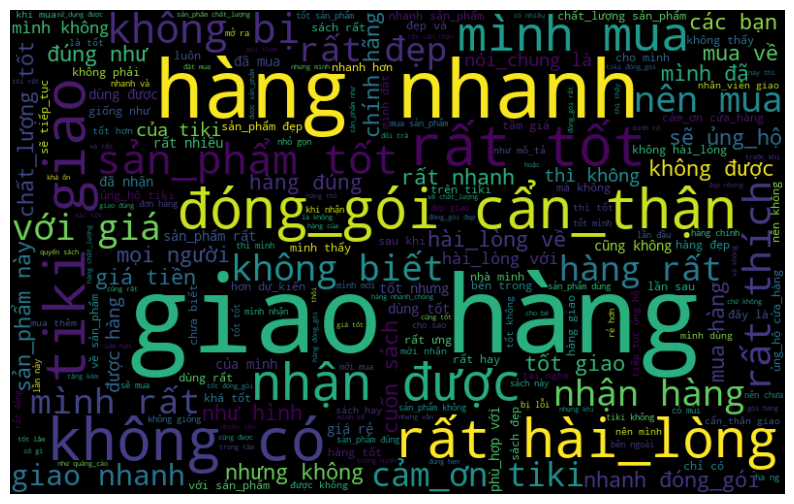

In [7]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in X_train])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [8]:
label_0_data = data[data['label'] == 0]
print(label_0_data)

                                                     text  label
0       tiki giao hàng nhanh đóng_gói cần thận nhân_vi...      0
2       ổn chất_lượng sẽ theo thời_gian trả_lời bây_gi...      0
3       sản_phẩm dùng tốt chất_lượng đường hàn_đẹp rất...      0
4       mình rất hài_lòng với sản_phẩm này và dịch_vụ ...      0
6        giao hàng rất nhanh hàng chính hãng được đập hộp      0
...                                                   ...    ...
326496          tạm chất_lượng mb nhưng cũng không rõ lắm      0
326497                       đã dùng tuần không vấn_đề gì      0
326498                             sản_phẩm okie đang xài      0
326501      mẫu_mã đẹp dễ sử_dụng chất_lượng hình_ảnh tốt      0
326503  ok tốt trong tâm_giá mình dùng cái cách đây nă...      0

[254549 rows x 2 columns]


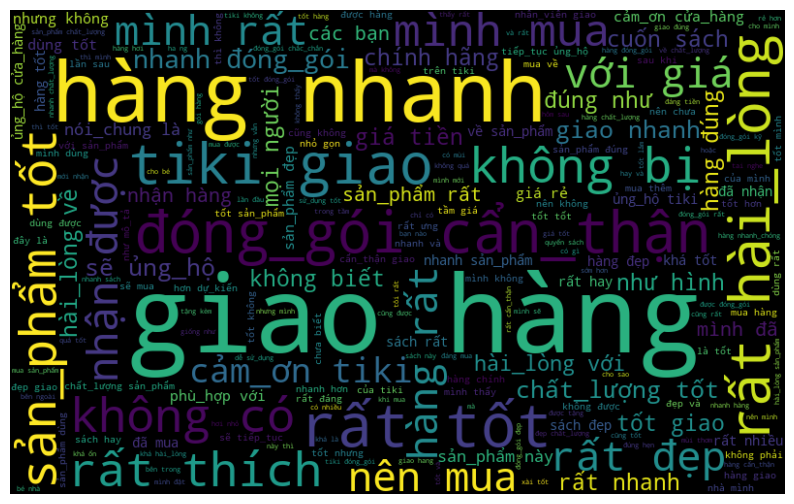

In [9]:
# Wordcloud label 0 (Positive)
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in label_0_data['text'].astype(str).values])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:
label_1_data = data[data['label'] == 1]
print(label_1_data)


                                                     text  label
1       tôi mua nó để chơi game để không làm_phiền ngư...      1
5       lần trước mua ăn rất ngon lần này oder hủ ăn q...      1
9       mình mua đơn hàng quyển và quyển này bị chia đ...      1
11      nhìn tổng_quan thì tốt nhưng chất_liệu xấu quá...      1
17      đóng_gói khá chắn_chắn trong hộp được tặng kèm...      1
...                                                   ...    ...
326505         nói là đàm_thoại chiều mà nghe đc có chiều      1
326506  không nên mua đảo p quảng_cáo k_k có vòng màu ...      1
326507     ok rất tốt nếu có mua thêm tôi sẽ mua loại này      1
326508               hỏng hồng ngoại_gởi trả lại bảo_hành      1
326509                không có củ sạc lại phải mua thêm à      1

[71961 rows x 2 columns]


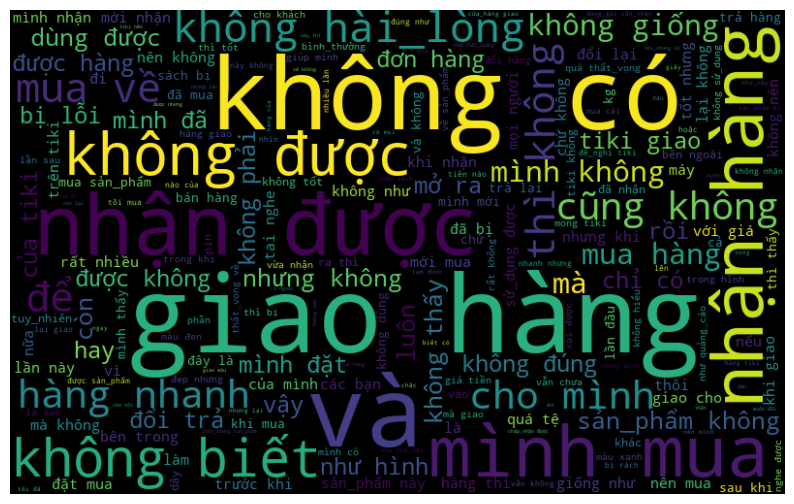

In [11]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in label_1_data['text'].astype(str).values])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data
data = pd.read_csv('./dataset/unique_data.csv', encoding='utf-8')  # Replace with your dataset path

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(data['text'].astype(str).values, data['label'], test_size=0.2, random_state=42)

# Sử dụng CountVectorizer để trích xuất đặc trưng
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# # Áp dụng SMOTE để xử lý mất cân bằng dữ liệu
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train_counts, y_train)

# # Kiểm tra phân phối sau khi áp dụng SMOTE
# print("Before SMOTE:", y_train.value_counts())
# print("After SMOTE:", pd.Series(y_train_smote).value_counts())

# Huấn luyện mô hình
model = MultinomialNB()
model.fit(X_train_counts, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test_counts)

# # Sử dụng CountVectorizer để trích xuất đặc trưng
# # Đọc stop words từ file CSV
# stop_words_df = pd.read_csv('./files/vietnamese-stopwords.txt')

# # Trích xuất đặc trưng
# count_vectorizer = CountVectorizer(stop_words = list(stop_words_df), max_features = 6000, ngram_range=(1, 2))
# X_train_counts = count_vectorizer.fit_transform(X_train)
# X_test_counts = count_vectorizer.transform(X_test)

# # Sử dụng TfidfTransformer để tính toán TF-IDF
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# # Huấn luyện mô hình Naive Bayes
# model = MultinomialNB()
# model.fit(X_train_tfidf, y_train)

# # Dự đoán
# y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8738323481669781
Confusion Matrix:
[[46692  4122]
 [ 4117 10371]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     50814
           1       0.72      0.72      0.72     14488

    accuracy                           0.87     65302
   macro avg       0.82      0.82      0.82     65302
weighted avg       0.87      0.87      0.87     65302



In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from underthesea import word_tokenize
import re

# Load data
data = pd.read_csv('./dataset/unique_data.csv', encoding='utf-8')  # Replace with your dataset path

# Chia dữ liệu thành tập train, val và test
X_train, X_test, y_train, y_test = train_test_split(data['text'].astype(str).values, data['label'], test_size=0.2, random_state=42)

# # Đọc stop words từ file CSV
stop_words_df = pd.read_csv('./files/vietnamese-stopwords.txt')

# # Trích xuất đặc trưng
count_vectorizer = CountVectorizer(
    analyzer='word',
    max_df=0.85, 
    min_df=5, 
    ngram_range=(1, 2), 
    token_pattern=r'\b\w+\b'
)

X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

print("X_train: ", X_train[0])
print("X_train_counts: ", X_train_counts[0])
print("X_test: ", X_test[0])
print("X_test_counts:", X_test_counts[0])

# # Áp dụng SMOTE để xử lý mất cân bằng dữ liệu
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train_counts, y_train)

# Kiểm tra phân phối sau khi áp dụng SMOTE
# print("Before SMOTE:", y_train.value_counts())
# print("After SMOTE:", pd.Series(y_train_smote).value_counts())

X_train:  dùng tốt tốt ký tự
X_train_counts:    (0, 24558)	1
  (0, 102756)	2
  (0, 44961)	1
  (0, 104682)	1
  (0, 25000)	1
  (0, 103402)	1
  (0, 103070)	1
  (0, 44965)	1
X_test:  máy chạy êm nhưng sao thiếu cái remote nhờ cửa_hàng xem_lại không thấy remote theo máy trong sản_phẩm co ghi là có remote nhưng không thấy nên mình chỉ de
X_test_counts:   (0, 10498)	1
  (0, 10585)	1
  (0, 12187)	1
  (0, 13515)	1
  (0, 15051)	1
  (0, 15332)	1
  (0, 16267)	1
  (0, 17069)	1
  (0, 21808)	1
  (0, 22116)	1
  (0, 22779)	1
  (0, 27101)	1
  (0, 27137)	1
  (0, 41763)	2
  (0, 42777)	2
  (0, 47253)	1
  (0, 47408)	1
  (0, 55887)	2
  (0, 55906)	1
  (0, 56089)	1
  (0, 56493)	1
  (0, 56567)	1
  (0, 67956)	2
  (0, 68253)	1
  (0, 68490)	1
  (0, 70205)	1
  (0, 70216)	1
  (0, 71831)	1
  (0, 72116)	1
  (0, 79352)	3
  (0, 79356)	1
  (0, 82142)	1
  (0, 82337)	1
  (0, 84961)	1
  (0, 88059)	1
  (0, 88152)	1
  (0, 88543)	1
  (0, 88564)	1
  (0, 92134)	2
  (0, 92489)	1
  (0, 96781)	1
  (0, 97065)	1
  (0, 112293)	1
  (0,

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from underthesea import word_tokenize
import re

# Load data
data = pd.read_csv('./dataset/unique_data.csv', encoding='utf-8')  # Replace with your dataset path

# Chia dữ liệu thành tập train, val và test
X_train, X_test, y_train, y_test = train_test_split(data['text'].astype(str).values, data['label'], test_size=0.2, random_state=42)

# # Đọc stop words từ file CSV
stop_words_df = pd.read_csv('./files/vietnamese-stopwords.txt')

# # Trích xuất đặc trưng
count_vectorizer = CountVectorizer(
    analyzer='word',
    max_df=0.85, 
    min_df=5, 
    ngram_range=(1, 2),
    stop_words = list(stop_words_df)
)

X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)


# # Áp dụng SMOTE để xử lý mất cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_counts, y_train)

# Kiểm tra phân phối sau khi áp dụng SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())

# # Huấn luyện mô hình Naive Bayes
model = MultinomialNB()
model.fit(X_train_smote, y_train_smote)

# # Dự đoán
y_pred = model.predict(X_test_counts)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Before SMOTE: label
0    203735
1     57473
Name: count, dtype: int64
After SMOTE: label
0    203735
1    203735
Name: count, dtype: int64
Accuracy: 0.8800802425653119
Confusion Matrix:
[[45286  5528]
 [ 2303 12185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     50814
           1       0.69      0.84      0.76     14488

    accuracy                           0.88     65302
   macro avg       0.82      0.87      0.84     65302
weighted avg       0.89      0.88      0.88     65302



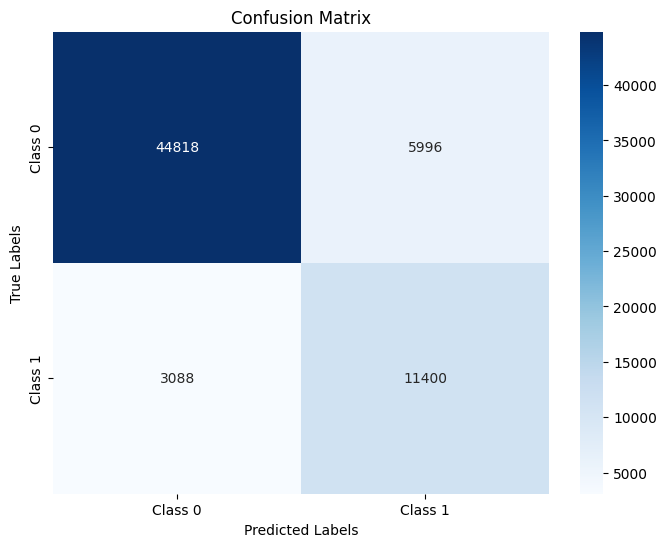

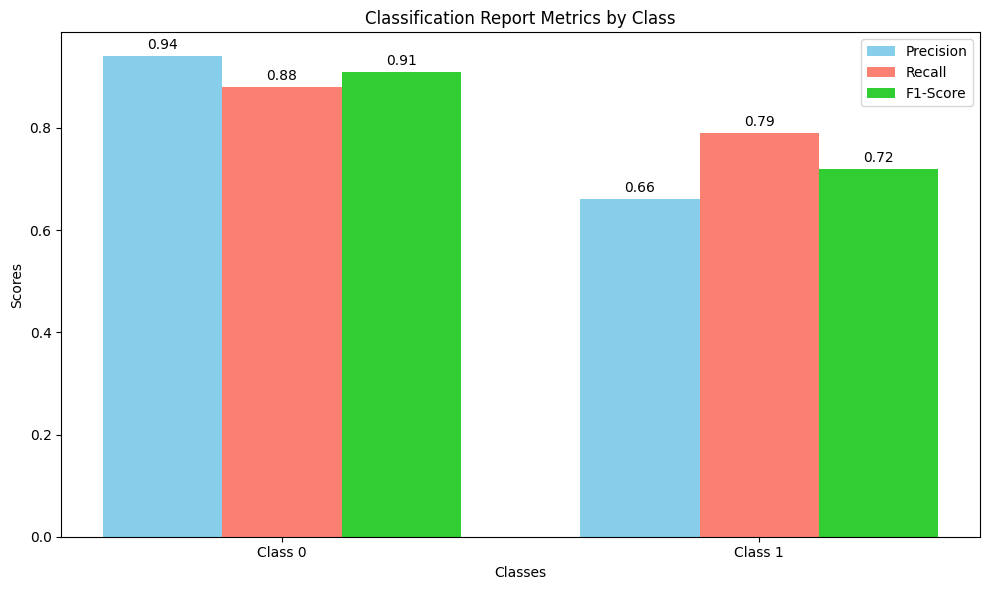

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data from the confusion matrix
confusion_matrix = np.array([[44818, 5996], [3088, 11400]])
labels = ["Class 0", "Class 1"]

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Data for classification report visualization
categories = ["Class 0", "Class 1"]
precision = [0.94, 0.66]
recall = [0.88, 0.79]
f1_score = [0.91, 0.72]

x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

# Plotting the classification report as bar charts
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width, precision, width, label="Precision", color='skyblue')
bars2 = ax.bar(x, recall, width, label="Recall", color='salmon')
bars3 = ax.bar(x + width, f1_score, width, label="F1-Score", color='limegreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel("Classes")
ax.set_ylabel("Scores")
ax.set_title("Classification Report Metrics by Class")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Annotating the bars with values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()